# Optional Lab - Multi-class Classification

## 1.1 Goals
In this lab, you will explore an example of multi-class classification using neural networks.
<figure>
 <img src="./images/C2_W2_mclass_header.png"   style="width500px;height:200px;">
</figure>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
from sklearn.datasets import make_blobs
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
np.set_printoptions(precision=2)
from lab_utils_multiclass_TF import *
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

# 2.0 Multi-class Classification
Neural Networks are often used to classify data. Examples are neural networks:
- take in photos and classify subjects in the photos as {dog,cat,horse,other}
- take in a sentence and classify the 'parts of speech' of its elements: {noun, verb, adjective etc..}  

A network of this type will have multiple units in its final layer. Each output is associated with a category. When an input example is applied to the network, the output with the highest value is the category predicted. If the output is applied to a softmax function, the output of the softmax will provide probabilities of the input being in each category. 

In this lab you will see an example of building a multiclass network in Tensorflow. We will then take a look at how the neural network makes its predictions.

Let's start by creating a four-class data set.

In [3]:
classes =4
m = 100
centers=[[-5,2], [-2,-2], [1,2], [5,-2]]
std=1.0
X_train, y_train = make_blobs(n_samples=m, centers=centers, 
                              cluster_std=std, random_state=30)

/home/ubuntu/2-code/StudyAtCoursera/Advanced_Learning_Algorithms/Week2/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,


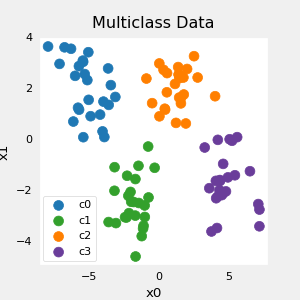

In [4]:
plt_mc(X_train,y_train,classes, centers, std=std)

In [5]:
print(f"unique classes {np.unique(y_train)}")
print(f"class representation {y_train[:10]}")
print(f"shape of X_train: {X_train.shape}, shape of y_train {y_train.shape}")

unique classes [0 1 2 3]
class representation [3 3 3 0 3 3 3 3 2 0]
shape of X_train: (100, 2), shape of y_train (100,)


In [6]:
tf.random.set_seed(1234) # applied to achieve consistent results
model= Sequential(
    [
        Dense(2, activation='relu', name="L1"),
        Dense(4, activation='linear', name="L2")
    ]
)


In [22]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.01)
)
model.fit(
    X_train,y_train,epochs=2000
)

Epoch 1/2000


4/4 [==============================] - 0s 2ms/step - loss: 7.7592e-06
Epoch 2/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.2549e-06
Epoch 3/2000
4/4 [==============================] - 0s 2ms/step - loss: 6.6327e-06
Epoch 4/2000
4/4 [==============================] - 0s 2ms/step - loss: 6.1320e-06
Epoch 5/2000
4/4 [==============================] - 0s 2ms/step - loss: 5.6564e-06
Epoch 6/2000
4/4 [==============================] - 0s 2ms/step - loss: 5.1963e-06
Epoch 7/2000
4/4 [==============================] - 0s 2ms/step - loss: 4.8649e-06
Epoch 8/2000
4/4 [==============================] - 0s 2ms/step - loss: 4.4858e-06
Epoch 9/2000
4/4 [==============================] - 0s 2ms/step - loss: 4.1997e-06
Epoch 10/2000
4/4 [==============================] - 0s 2ms/step - loss: 3.9184e-06
Epoch 11/2000
4/4 [==============================] - 0s 2ms/step - loss: 3.7157e-06
Epoch 12/2000
4/4 [==============================] - 0s 2ms/step - loss: 3.5083e-06
Epoch 13/2000


184/184 [==============================] - 0s 1ms/step


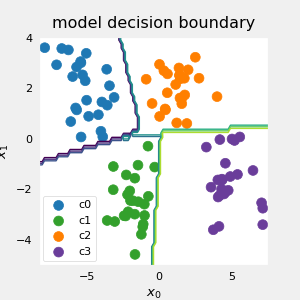

In [23]:
plt_cat_mc(X_train, y_train, model, classes)

In [24]:
l1 = model.get_layer('L1')
W1,b1 = l1.get_weights()

/home/ubuntu/2-code/StudyAtCoursera/Advanced_Learning_Algorithms/Week2/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,
/home/ubuntu/2-code/StudyAtCoursera/Advanced_Learning_Algorithms/Week2/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,


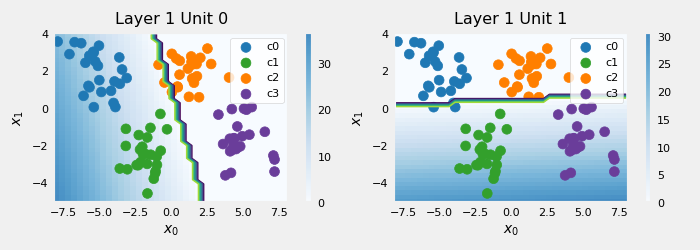

In [25]:
plt_layer_relu(X_train, y_train.reshape(-1,), W1, b1, classes)

/home/ubuntu/2-code/StudyAtCoursera/Advanced_Learning_Algorithms/Week2/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,
/home/ubuntu/2-code/StudyAtCoursera/Advanced_Learning_Algorithms/Week2/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,
/home/ubuntu/2-code/StudyAtCoursera/Advanced_Learning_Algorithms/Week2/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,
/home/ubuntu/2-code/StudyAtCoursera/Advanced_Learning_Algorithms/Week2/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,


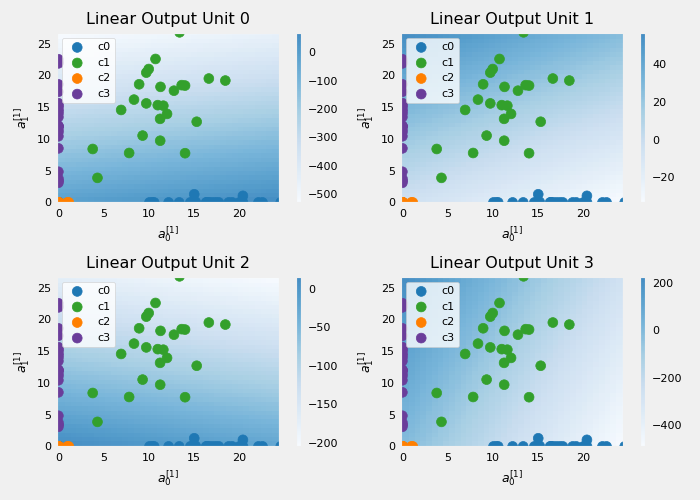

In [26]:
l2 = model.get_layer("L2")
W2, b2 = l2.get_weights()

Xl2 = np.maximum(0, np.dot(X_train,W1) + b1)

plt_output_layer_linear(Xl2, y_train.reshape(-1,), W2, b2, classes,
                        x0_rng = (-0.25,np.amax(Xl2[:,0])), x1_rng = (-0.25,np.amax(Xl2[:,1])))